In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, RocCurveDisplay, PrecisionRecallDisplay

In [2]:
df = pd.read_csv('../../Python for ML/DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

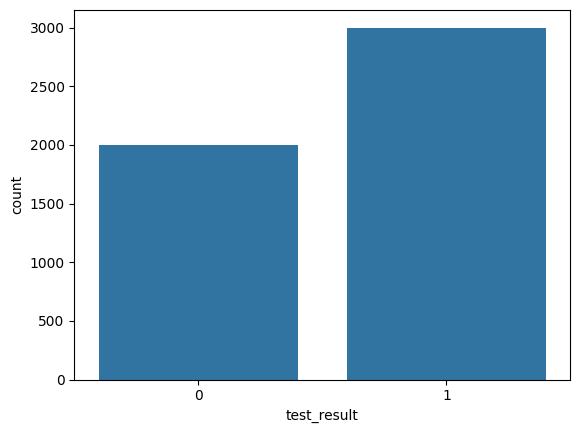

In [7]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

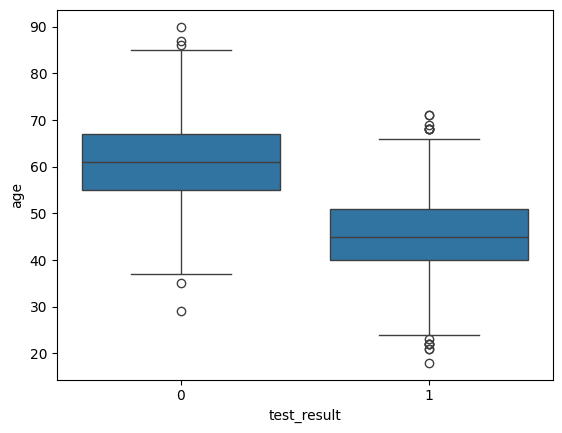

In [8]:
sns.boxplot(x='test_result', y='age', data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

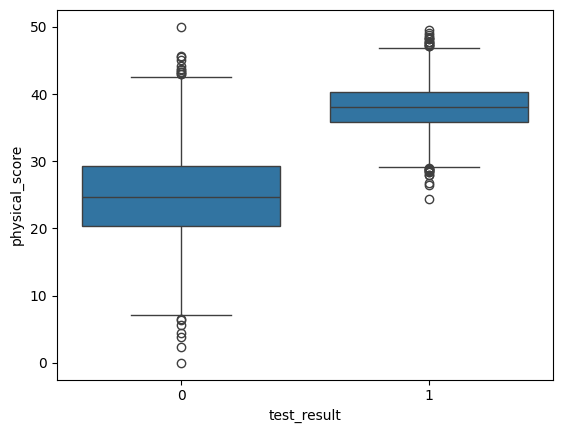

In [9]:
sns.boxplot(x='test_result', y='physical_score', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

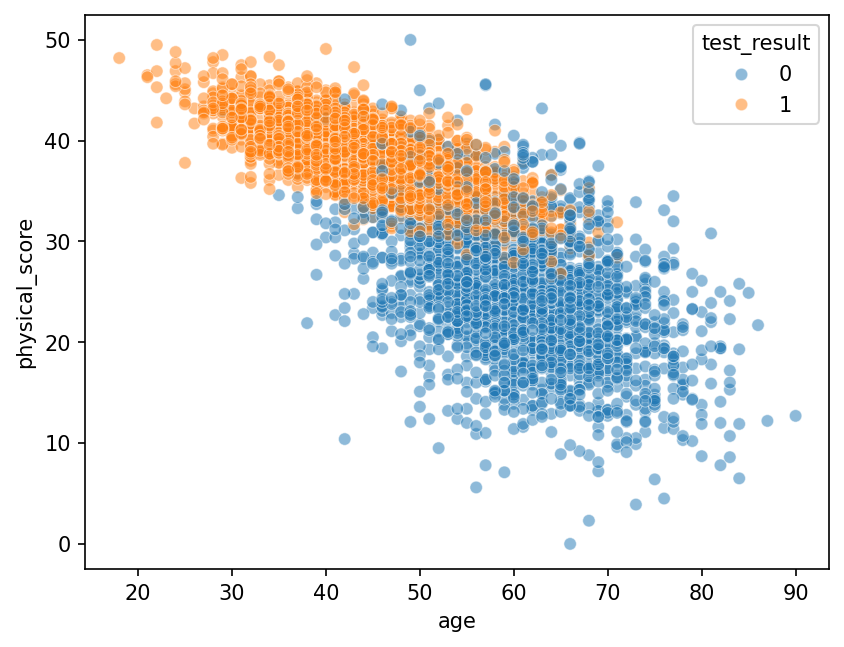

In [13]:
plt.figure(dpi=150)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)

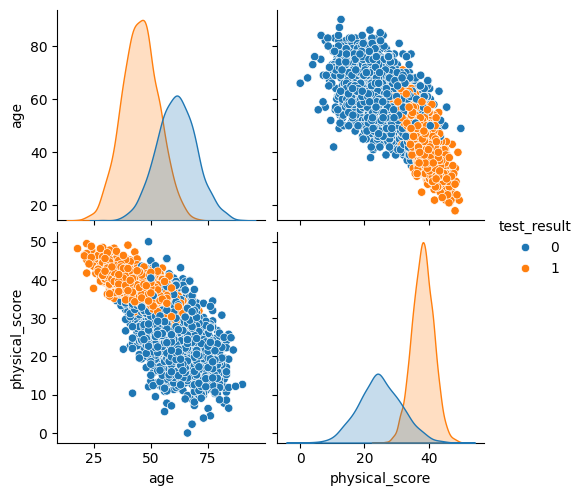

In [14]:
sns.pairplot(df, hue='test_result')

<Axes: >

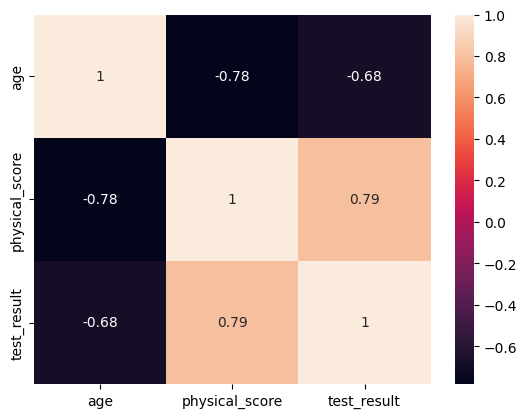

In [15]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

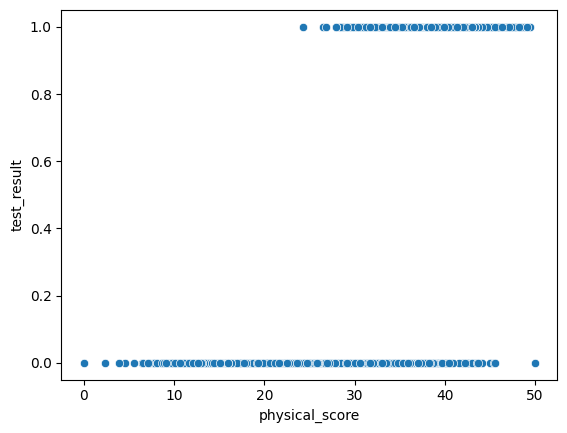

In [18]:
sns.scatterplot(x='physical_score', y='test_result', data=df)

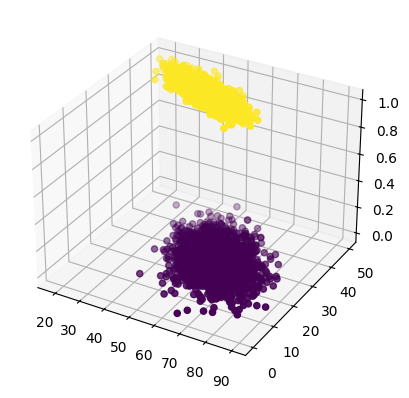

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [22]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [25]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)

In [29]:
scaled_X_test = scaler.transform(X_test)

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [33]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [36]:
y_predicted = log_model.predict(scaled_X_test)
y_predicted

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [38]:
y_predicted_prob = log_model.predict_proba(scaled_X_test)
y_predicted_prob[:5]

array([[0.0308819 , 0.9691181 ],
       [0.03457373, 0.96542627],
       [0.98987542, 0.01012458],
       [0.00263181, 0.99736819],
       [0.97684893, 0.02315107]])

In [39]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [42]:
y_pred = log_model.predict(scaled_X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.924

In [49]:
confusion_matrix(y_test, y_pred)

array([[173,  20],
       [ 18, 289]])

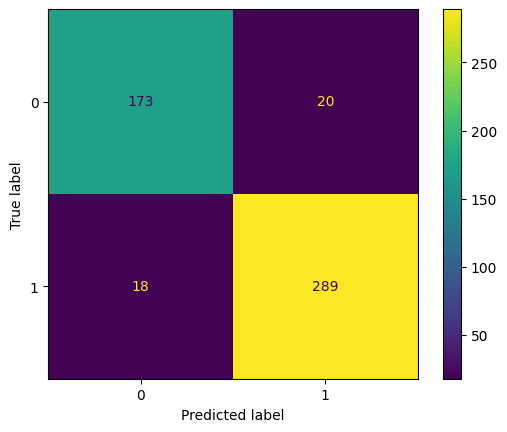

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

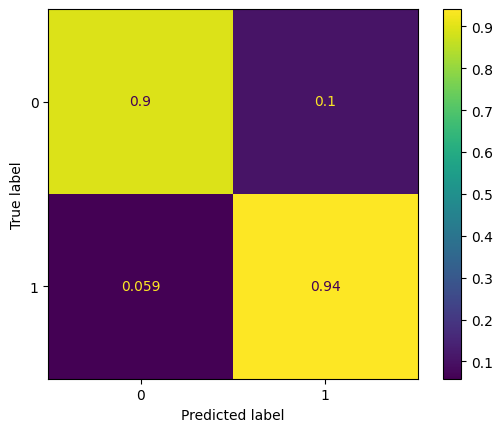

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

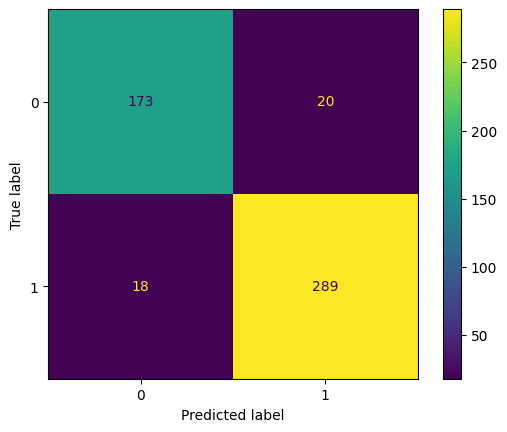

In [57]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [61]:
precision_score(y_test, y_pred)

0.9352750809061489

In [62]:
recall_score(y_test, y_pred)

0.9413680781758957

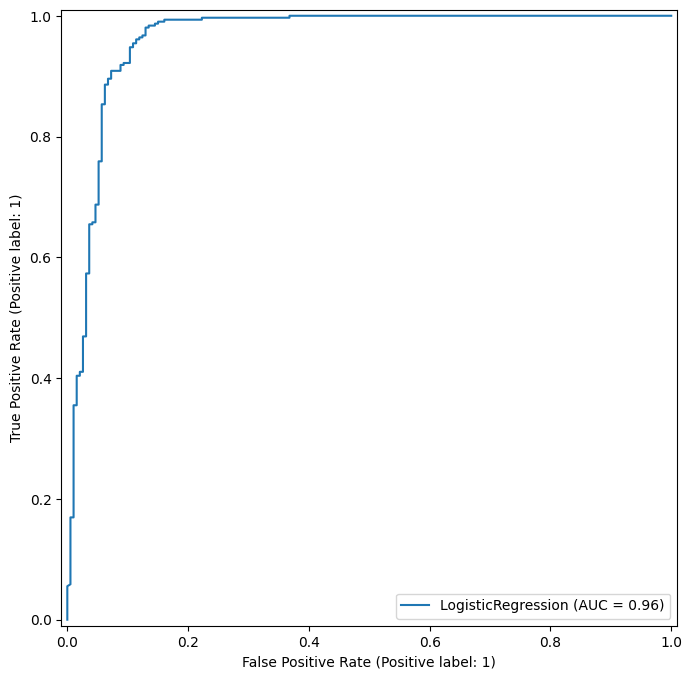

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

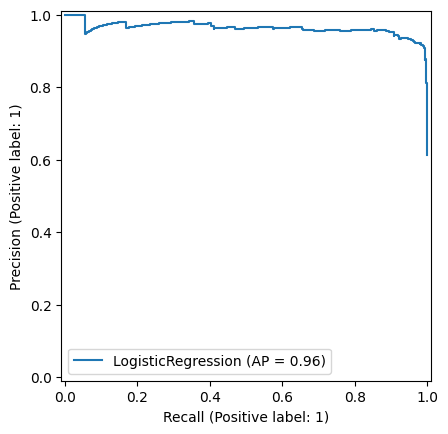

In [69]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [71]:
log_model.predict_proba(scaled_X_test)[:5]

array([[0.0308819 , 0.9691181 ],
       [0.03457373, 0.96542627],
       [0.98987542, 0.01012458],
       [0.00263181, 0.99736819],
       [0.97684893, 0.02315107]])

In [73]:
y_test[:5]

1718    1
2511    1
345     0
2521    1
54      0
Name: test_result, dtype: int64